<a href="https://colab.research.google.com/github/AilingLiu/Time-Series-Python/blob/main/1_Correlation_and_Autocorrelation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Correlation of Two Time Series

- we can use scatter plot to check the correlation, between -1 to 1, where -1 or 1 being absolutely correlated.
- beawere of two correlated series may not have the same intensity of its percentage change

In [2]:
import pandas as pd
import requests, zipfile, io

ufo = pd.read_csv('https://assets.datacamp.com/production/repositories/1120/datasets/c89d2158693af7d555a008198629d93aa059236e/UFO.csv')
temperature = pd.read_csv('https://assets.datacamp.com/production/repositories/1120/datasets/850e5614f8de4b134f40b4eeca27c7d0b91aeed2/NOAA_TAVG.csv')

r = requests.get('https://github.com/AilingLiu/Time-Series-Python/raw/main/data.zip')
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()
dow=pd.read_csv('data/DJI.csv', sep=',')
ufo.index=pd.to_datetime(ufo['Date'], format='%Y')
ufo.columns=['ufo_date', 'sights']

temperature.index=pd.to_datetime(temperature['DATE'], format='%Y')

dow.index=pd.to_datetime(dow['Date'], format='%Y')
dow.columns=['dow_date', 'dow_value']

ufo_dow = ufo.join(dow, how='inner')

In [39]:
z.namelist()

['data/',
 'data/.DS_Store',
 '__MACOSX/',
 '__MACOSX/data/',
 '__MACOSX/data/._.DS_Store',
 'data/AMZN.csv',
 '__MACOSX/data/._AMZN.csv',
 'data/CME_HO1.csv',
 '__MACOSX/data/._CME_HO1.csv',
 'data/CME_NG1.csv',
 '__MACOSX/data/._CME_NG1.csv',
 'data/DJI.csv',
 '__MACOSX/data/._DJI.csv',
 'data/HRB.csv',
 '__MACOSX/data/._HRB.csv',
 'data/MSFT.csv',
 '__MACOSX/data/._MSFT.csv',
 'data/Sprint_Intraday.txt',
 '__MACOSX/data/._Sprint_Intraday.txt']

In [3]:
ufo_dow.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 73 entries, 1941-01-01 to 2013-01-01
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ufo_date   73 non-null     int64  
 1   sights     73 non-null     int64  
 2   dow_date   73 non-null     int64  
 3   dow_value  73 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 4.9 KB


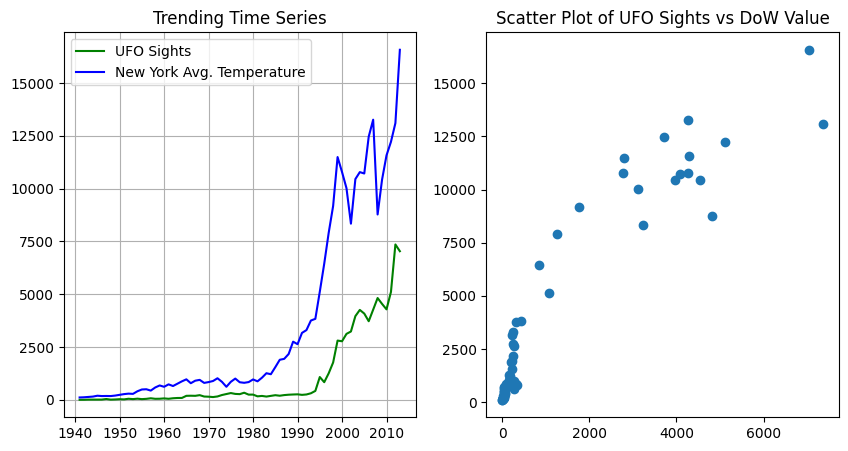

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, (ax, ax1) = plt.subplots(1,2, figsize=(10, 5))

ax.plot(ufo_dow.index, ufo_dow.sights, label='UFO Sights', c='green')
# ax2=ax.twinx()
ax.plot(ufo_dow.index, ufo_dow.dow_value, label='New York Avg. Temperature', c='blue')
ax.legend(loc=2)
ax.grid()
ax.set_title('Trending Time Series')

ax1.scatter(ufo_dow.sights, ufo_dow.dow_value)
ax1.set_title('Scatter Plot of UFO Sights vs DoW Value')
plt.show()

In [42]:
# correlation of levels
ufo_dow[['sights', 'dow_value']].corr()

,sights,dow_value
sights,1.000000,0.939976
dow_value,0.939976,1.000000


In [46]:
# correlation of percent changes
ufo_dow['sights'].pct_change().corr(ufo_dow['dow_value'].pct_change(), method='pearson')

0.06026935462405376

# Simple Linear Regression

- $y_t=\alpha+\beta x_t + \epsilon_t$
- simple linear regression is also known as Ordinary Least Squares (OLS), because it minimizes the sum of the squared distances between the data points and the regression line.
- python packages to perform regression

- In statesmodels:
```
import statsmodels.api as sm
sm.OLS(y, x).fit()
```

- In numpy
```
np.plolyfit(x, y, deg=1)
```

- In pandas:
```
pd.ols(y,x)
```

- In scipy:
```
from scipy import stats
stats.linregress(x, y)
```

Warning: the order of x and y is not consistent across packages.

In [13]:
import statsmodels.api as sm

dfx = ufo_dow[['sights']]
dfx1=sm.add_constant(dfx)

result=sm.OLS(ufo_dow['dow_value'], dfx1).fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              dow_value   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     538.7
Date:                Wed, 17 May 2023   Prob (F-statistic):           7.05e-35
Time:                        21:32:07   Log-Likelihood:                -638.10
No. Observations:                  73   AIC:                             1280.
Df Residuals:                      71   BIC:                             1285.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        998.5938    209.072      4.776      0.0

In [14]:
# the quared root of R-squared is correlation
0.884**0.5

0.9402127418834527

In [16]:
# constant
result.params[0]

998.5937904544492

In [18]:
# slope
result.params[1]

2.323073722942426

## Relationship between R-squared and Correlation

- $[corr(x,y)]^2 = R^2$ (or R-squared)
- sign(corr)=sign(regression slope)

# Autocorrelation

- seriel correlation: lag-one autocorrelation
- Following large jumps, either up or down, stock prices tend to reverse. This is described as **mean reversion** in stock prices: prices tend to bounce back, or revert, towards previous levels after large moves, which are observed over time horizons of about a week. A more mathematical way to describe mean reversion is to say that stock returns are negatively autocorrelated.

In [37]:
MSFT=pd.read_csv('data/MSFT.csv', sep=',')

# Convert the daily data to weekly data
MSFT.index=pd.to_datetime(MSFT['Date'])
MSFT = MSFT.resample('W').last().drop(columns='Date')
# Compute the percentage change of prices
returns = MSFT.pct_change()
# Compute and print the autocorrelation of returns
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly returns is %4.2f" %(autocorrelation))

The autocorrelation of weekly returns is -0.16


Notice how the autocorrelation of returns for MSFT is negative, so the stock is 'mean reverting'.

In [47]:
daily_rates=pd.read_csv('data/AMZN.csv', sep=',')
# Convert the daily data to weekly data
daily_rates.index=pd.to_datetime(daily_rates['Date'])
daily_rates = daily_rates.drop(columns='Date')

# Compute the daily change in interest rates 
daily_diff = daily_rates.diff()

# Compute and print the autocorrelation of daily changes
autocorrelation_daily = daily_diff['Adj Close'].autocorr()
print("The autocorrelation of daily interest rate changes is %4.2f" %(autocorrelation_daily))

# Convert the daily data to annual data
yearly_rates = daily_rates.resample('A').last()

# Repeat above for annual data
yearly_diff = yearly_rates.diff()
autocorrelation_yearly = yearly_diff['Adj Close'].autocorr()
print("The autocorrelation of annual interest rate changes is %4.2f" %(autocorrelation_yearly))



The autocorrelation of daily interest rate changes is 0.01
The autocorrelation of annual interest rate changes is -0.15


When you look at daily changes in interest rates, the autocorrelation is close to zero. However, if you resample the data and look at annual changes, the autocorrelation is negative. This implies that while short term changes in interest rates may be uncorrelated, long term changes in interest rates are negatively autocorrelated. A daily move up or down in interest rates is unlikely to tell you anything about interest rates tomorrow, but a move in interest rates over a year can tell you something about where interest rates are going over the next year. And this makes some economic sense: over long horizons, when interest rates go up, the economy tends to slow down, which consequently causes interest rates to fall, and vice versa.